# The Math of Similarity

**Embeddings** are list of numbers, specifically an array of floating point numbers, that are predictions from a model that has been trained to represent high-dimentional data (text, images, video, audio) into a lower-dimensional space.  This effectively captures semantic meaning and structural relationships with the data.

The lists of floats are **vector spaces** where each number represents a latent feature.

Mathemtical operations on the embeddings are used to calculate **distance metrics** to measure similarity between embeddings.

This notebook workflow will introduce the math behind common distance metrics and provide intuition behind what each is measuring.

---
## Setup

Keep it simple! A full walk through with just [numpy](https://numpy.org/doc/stable/index.html) (for mathy things) and [matplotlib](https://matplotlib.org/) (for seeing the math in pictures).

### Installs (If Needed)

In [106]:
# tuples of (import name, install name, min_version)
packages = [
    ('numpy', 'numpy'),
    ('matplotlib', 'matplotlib')
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user
    elif len(package) == 3:
        if importlib.metadata.version(package[0]) < package[2]:
            print(f'updating package {package[1]}')
            install = True
            !pip install {package[1]} -U -q --user

### Packages

In [107]:
import numpy as np
import matplotlib.pyplot as plt

---
## Create Example Embeddings


In [5]:
embeddings = np.random.rand(1000, 2)

In [12]:
example_a = embeddings[0]
example_b = embeddings[-1]

In [13]:
example_a, example_b

(array([0.71395259, 0.45081254]), array([0.52904412, 0.26408864]))

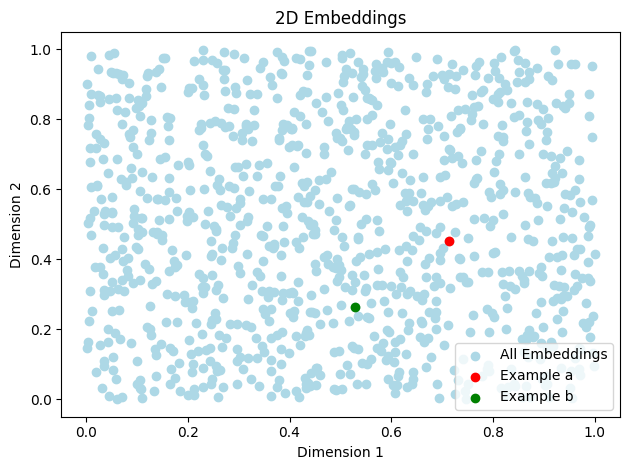

In [22]:
# Create a scatter plot of all embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1], color='lightblue', label='All Embeddings')

# Plot the two examples with different colors
plt.scatter(example_a[0], example_a[1], color='red', label='Example a')
plt.scatter(example_b[0], example_b[1], color='green', label='Example b')

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Embeddings')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
## Embeddings Are Vectors

The two example embeddings can be plotted as vectors with origin (0,0):


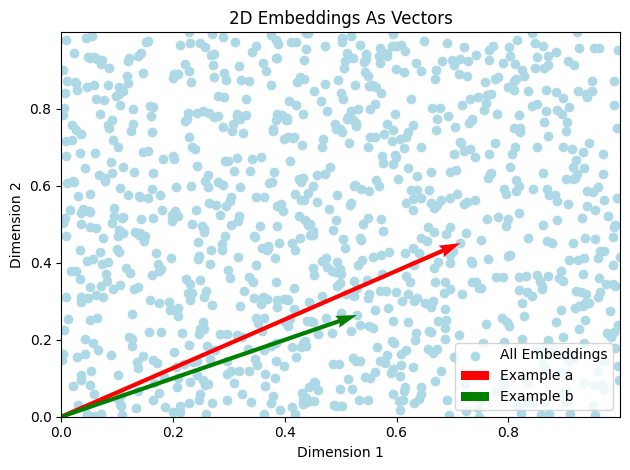

In [51]:
# Create a scatter plot of all embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1], color='lightblue', label='All Embeddings')

# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a[0], example_a[1], angles='xy', scale_units='xy', scale=1, color='red', label='Example a')
plt.quiver(0, 0, example_b[0], example_b[1], angles='xy', scale_units='xy', scale=1, color='green', label='Example b')

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(0, max(embeddings[:, 0]))
plt.ylim(0, max(embeddings[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Embeddings As Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
## Magnitude of Vectors (aka norms)

> Learning a bit about vector math can be very helpful here!  Let's keep it light and geometrically motivated.

When we think magnitude and see a line like the red and green ones for our example vectors we think **length**.  Turns out that is a great way to think about it.  But remember, the line represents our vector (an embedding) and could have many more dimensions than we can visualize.  Beyond two dimensions the distance could be a bit more complex to think about.  This section will show the most common norms, their calcuations, and visually represent them for stronger intuition.  

A tiny bit of notation.  A norm of a value is represented by what appears to be double absolute value signs. For instance, the norm for a vector `a` would be notated as: $||a||$.  Extending this a bit is the inclusion of the type of norm with subscript value like: $||a||_2$.  When the subscript is missing it typically means 2 which is the Euclidean norm that is covered first below.

Read more about [norms](https://en.wikipedia.org/wiki/Norm_(mathematics))

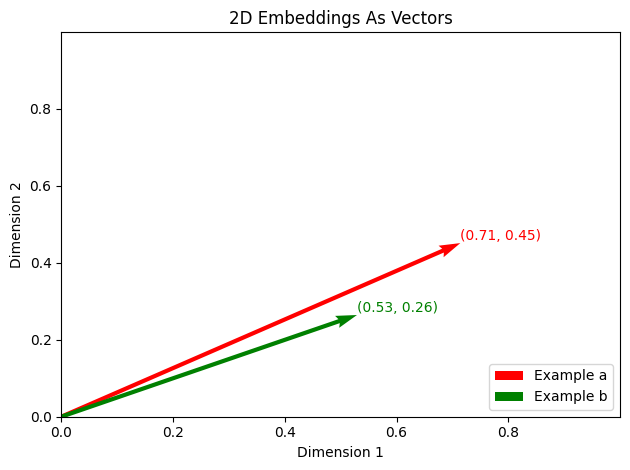

In [97]:
# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a[0], example_a[1], angles='xy', scale_units='xy', scale=1, color='red', label='Example a')
plt.quiver(0, 0, example_b[0], example_b[1], angles='xy', scale_units='xy', scale=1, color='green', label='Example b')

# Annotate the ends of the vectors with their coordinates
plt.text(example_a[0], example_a[1], f"({example_a[0]:.2f}, {example_a[1]:.2f})", color='red', ha='left', va='bottom')
plt.text(example_b[0], example_b[1], f"({example_b[0]:.2f}, {example_b[1]:.2f})", color='green', ha='left', va='bottom')


# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(0, max(embeddings[:, 0]))
plt.ylim(0, max(embeddings[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Embeddings As Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
### Euclidean Norm (L2 norm)

The Euclidean norm, or L2 norm, is the straight line distance: notated as $||a||_2$. Distance is calculated by taking the square root of the sum of squared coordinates.  In math that looks like:

$$
||a||_2 = \sqrt{\sum_{i=0}^{n} (a_i)^2} = \sqrt{(a_0)^2 + (a_1)^2 + ... (a_n)^2}
$$

Now let's calculate this for `example_a` in three difference ways:
- manually
- brute force
- with a function

Review the vector for the `example_a` embedding:

In [67]:
example_a

array([0.71395259, 0.45081254])

Manually calculate the L2 norm without any vector math:

In [74]:
np.sqrt(example_a[0]**2 + example_a[1]**2)

0.8443697313870246

Calculate the L2 norm using vector math to compute the squared values by squaring the vector:

In [75]:
np.sqrt(np.sum(example_a**2))

0.8443697313870246

Use a function to directly compute the L2 norm:

In [77]:
np.linalg.norm(example_a, 2)

0.8443697313870246

---
### Manhattan Norm (L1 norm)

The Manhattan norm, or L1 norm, is often referred to as the taxicab norm: notated as $||a||_1$.  Rather than directly going between coordinates it uses an imaginary grid, like a city, and traverses the distance using only horizontal and vertical movements.  In other words, you sum the absolute values of each coordinate representing a distance moved.  In math that looks like:

$$
||a||_1 = \sum_{i=0}^{n} |a_i| = |a_0| + |a_1| + ... |a_n|
$$

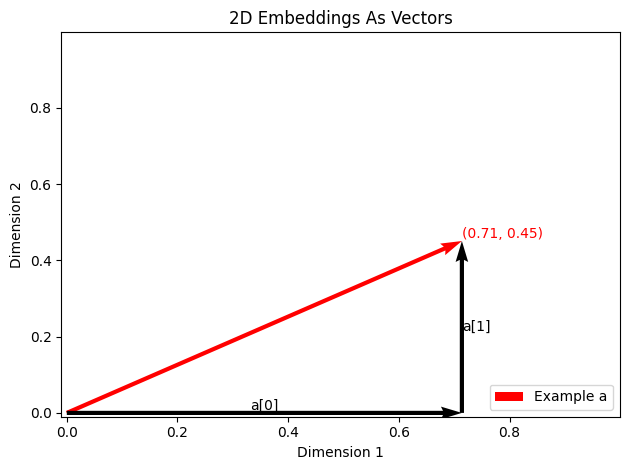

In [85]:
# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a[0], example_a[1], angles='xy', scale_units='xy', scale=1, color='red', label='Example a')

# Annotate the ends of the vectors with their coordinates
plt.text(example_a[0], example_a[1], f"({example_a[0]:.2f}, {example_a[1]:.2f})", color='red', ha='left', va='bottom')

# Add a vector from the origin to example_a[0]
plt.quiver(0, 0, example_a[0], 0, angles='xy', scale_units='xy', scale=1, color='black')
plt.text(example_a[0] / 2, 0, 'a[0]', color='black', ha='center', va='bottom')
plt.quiver(example_a[0], 0, 0, example_a[1], angles='xy', scale_units='xy', scale=1, color='black')
plt.text(example_a[0], example_a[1] / 2, 'a[1]', color='black', ha='left', va='center')


# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(-0.01, max(embeddings[:, 0]))
plt.ylim(-0.01, max(embeddings[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Embeddings As Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

Review the vector for the `example_a` embedding:

In [86]:
example_a

array([0.71395259, 0.45081254])

Manually calculate the L1 norm without any vector math:

In [87]:
abs(example_a[0]) + abs(example_a[1])

1.1647651256280853

Calculate the L1 norm using vector math to compute the absolute values for the vector:

In [88]:
np.sum(np.abs(example_a))

1.1647651256280853

Use a function to directly compute the L1 norm:

In [89]:
np.linalg.norm(example_a, 1)

1.1647651256280853

### Maximum Norm (L&#8734; norm)

The maximum norm, or infinity norm is maximum component length of the vector: notated as $||a||_\infty$.  This represents the magnitude as the single component with the largest magnitude, or absolute value.  The math looks like:

$$
||a||_\infty = \max(|a_i|, i \in [0, n]) = \max(|a_0|, |a_1|, ..., |a_n|)
$$


Review the vector for the `example_a` embedding:

In [90]:
example_a

array([0.71395259, 0.45081254])

Manually calculate the L&#8734; norm without any vector math:

In [94]:
max([abs(example_a[0]), abs(example_a[1])])

0.7139525904474127

Calculate the L&#8734; norm using vector math to compute the absolute values for the vector:

In [95]:
np.max(np.abs(example_a))

0.7139525904474127

Use a function to directly compute the L&#8734; norm:

In [96]:
np.linalg.norm(example_a, np.inf)

0.7139525904474127

---
## Normalizing Vectors

We will eventually see that normalizing vectors makes interpretation and comparison easier.  It also simplifies calcuations and even makes some distance measures identical.  First, let's understand the intuition of normalization.  

The embeddings, vectors, represent a direction and distance.  Without knowing the possible distance it is hard to interpret how far is a little, typical, or a lot.  Putting vectors on a common scale makes them directly comparable and interpretable.  The most common way of doing this is to divide each vector by its magnitude which results in a new magnitude of 1.

We learned all about **magnitude** above and know that norms measure the magnitude.  Dividing a vector by its magnitude has this math:
> note that a normalized vector is indicated by giving it a hat: $\hat{a}$

$$
\hat{a} = \frac{a}{||a||_2}
$$



Normalize the examples and plot to compare the original to the normalized embeddings:

In [248]:
example_a_normalized = example_a / np.linalg.norm(example_a, 2)
example_b_normalized = example_b / np.linalg.norm(example_b, 2)

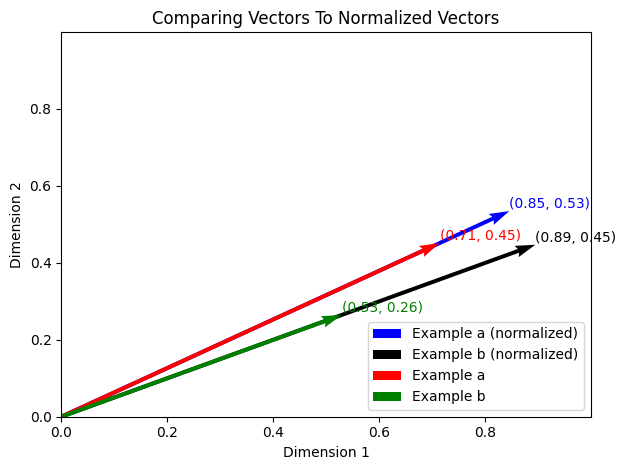

In [262]:
# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a_normalized[0], example_a_normalized[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Example a (normalized)')
plt.quiver(0, 0, example_b_normalized[0], example_b_normalized[1], angles='xy', scale_units='xy', scale=1, color='black', label='Example b (normalized)')
plt.quiver(0, 0, example_a[0], example_a[1], angles='xy', scale_units='xy', scale=1, color='red', label='Example a')
plt.quiver(0, 0, example_b[0], example_b[1], angles='xy', scale_units='xy', scale=1, color='green', label='Example b')

# Annotate the ends of the vectors with their coordinates
plt.text(example_a[0], example_a[1], f"({example_a[0]:.2f}, {example_a[1]:.2f})", color='red', ha='left', va='bottom')
plt.text(example_b[0], example_b[1], f"({example_b[0]:.2f}, {example_b[1]:.2f})", color='green', ha='left', va='bottom')
plt.text(example_a_normalized[0], example_a_normalized[1], f"({example_a_normalized[0]:.2f}, {example_a_normalized[1]:.2f})", color='blue', ha='left', va='bottom')
plt.text(example_b_normalized[0], example_b_normalized[1], f"({example_b_normalized[0]:.2f}, {example_b_normalized[1]:.2f})", color='black', ha='left', va='bottom')

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(0, max(embeddings[:, 0]))
plt.ylim(0, max(embeddings[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Comparing Vectors To Normalized Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

Normalize all the embeddings and plot them:

In [264]:
# Calculate the magnitudes of the vectors
magnitudes = np.linalg.norm(embeddings, axis=1, keepdims=True)
# Avoid division by zero
magnitudes[magnitudes == 0] = 1
# create normalized embeddings using the magnitudes:
embeddings_normalized = embeddings / magnitudes

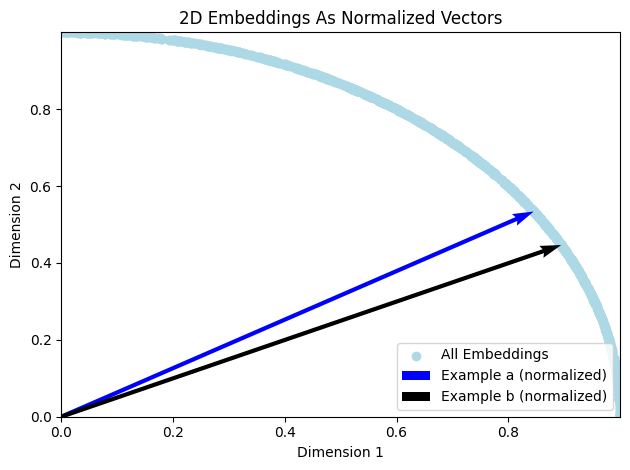

In [266]:
# Create a scatter plot of all embeddings
plt.scatter(embeddings_normalized[:, 0], embeddings_normalized[:, 1], color='lightblue', label='All Embeddings')

# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a_normalized[0], example_a_normalized[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Example a (normalized)')
plt.quiver(0, 0, example_b_normalized[0], example_b_normalized[1], angles='xy', scale_units='xy', scale=1, color='black', label='Example b (normalized)')

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(0, max(embeddings_normalized[:, 0]))
plt.ylim(0, max(embeddings_normalized[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Embeddings As Normalized Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

**Interpretation**

Dividing by the magnitude makes all vectors have magnitude 1.  This makes the vectors appear to be on a circle with radius 1 (the unit circle).  Similar vectors would be close to each other on the circumferance which means they have a small angle between them.  Hold onto this concept as it will help understand the difference (or similarity) between **dot product similarity** and **cosine similarity**.

---
## Distance Measures

This section build on the knowledge of measuring length (magnitude, norms), and putting vectors on a interpetable scale (normalization).  Now, we can look at methods to compare vectors and interpret the relationship - **Distance Measures**. Specifically:
- Euclidean Distance
    - the straight line distance between two points represented by vectors
- Dot Product Similarity
    - Considers both the magnitude of each vector and the angle between them
- Cosine Similarity
    - Consider just the angle between vectors
    
In the following section each distance measure is presented for the vectors and the normalized vectors.

---
### Euclidean Distance

The **Euclidean distance** is the length of the straight-line connecting two points.  In math this looks like:

$$
d(a, b) = \sqrt{\sum_{i=0}^{n} (a_i - b_i)^2} = \sqrt{(a_0 - b_0)^2 + (a_1 - b_1)^2 + ... (a_n - b_n)^2}
$$

Remember the section above about magnitudes, aka norms?  Well the L2 norm has a similar name: Euclidean Norm.  That is not just a coincidence as we can directly use L2 norm to calculate this rather than this longer form calculation!

$$
d = a - b
$$

$$
||d||_2 = \sqrt{\sum_{i=0}^{n} (d_i)^2} = \sqrt{(d_0)^2 + (d_1)^2 + ... (d_n)^2}
$$

**Interpretation**

What is the interpretation of the length?  Well, it depends on the scale of the data.  In this case the vectors are randomly generated from uniform values in the range (0, 1).  That means the distance would be 0 and max would be $\sqrt 2$ (think about distance between (0, 1) and (1,0)).  Normalizing vectors brings them to this scale also by dividing any vector by its magnitude - a common practice.

Read more about [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)

#### Between Vectors

> See the same workflow for normalized vectors after this sections.

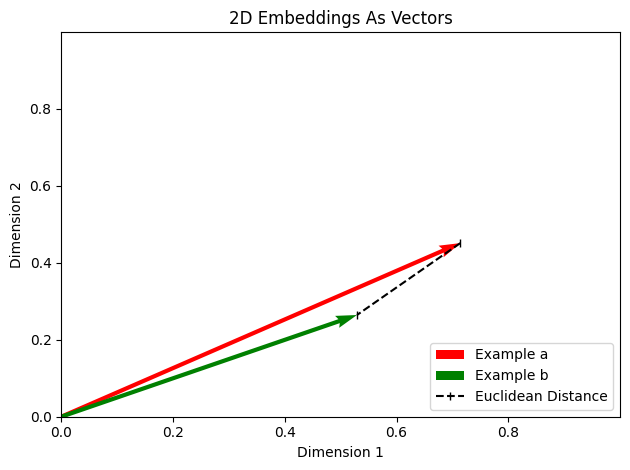

In [120]:
# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a[0], example_a[1], angles='xy', scale_units='xy', scale=1, color='red', label='Example a')
plt.quiver(0, 0, example_b[0], example_b[1], angles='xy', scale_units='xy', scale=1, color='green', label='Example b')

# Draw a line connecting the two examples with ends indicating distance
plt.plot([example_a[0], example_b[0]], [example_a[1], example_b[1]], linestyle='--', marker='|', color='black', label='Euclidean Distance')

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(0, max(embeddings[:, 0]))
plt.ylim(0, max(embeddings[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Embeddings As Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

Calculate the distance vector:

In [110]:
distance = example_a - example_b
distance

array([0.18490847, 0.1867239 ])

Calculate the Euclidean distance directly:

In [111]:
euclidean_distance = np.sqrt(np.sum((distance)**2))
euclidean_distance

0.2627869041125236

Calculate the Euclidean distance as the L2 Norm:

In [112]:
euclidean_distance = np.linalg.norm(distance, 2)
euclidean_distance

0.2627869041125236

#### Between Normalized Vectors

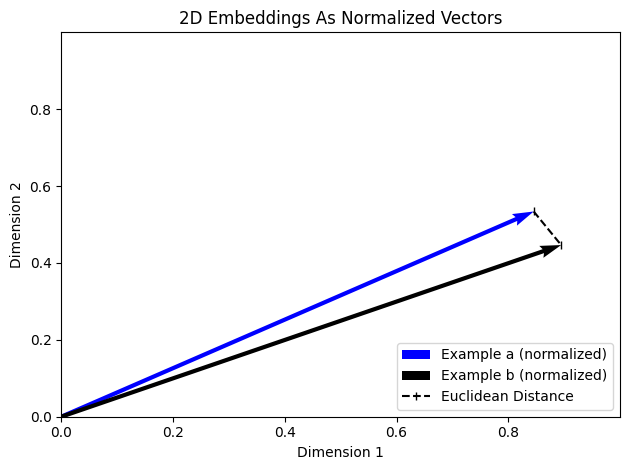

In [267]:
# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a_normalized[0], example_a_normalized[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Example a (normalized)')
plt.quiver(0, 0, example_b_normalized[0], example_b_normalized[1], angles='xy', scale_units='xy', scale=1, color='black', label='Example b (normalized)')

# Draw a line connecting the two examples with ends indicating distance
plt.plot([example_a_normalized[0], example_b_normalized[0]], [example_a_normalized[1], example_b_normalized[1]], linestyle='--', marker='|', color='black', label='Euclidean Distance')

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(0, max(embeddings_normalized[:, 0]))
plt.ylim(0, max(embeddings_normalized[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Embeddings As Normalized Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

Calculate the distance vector:

In [268]:
distance_normalized = example_a_normalized - example_b_normalized
distance_normalized

array([-0.04917522,  0.0872771 ])

Calculate the Euclidean distance directly:

In [269]:
euclidean_distance_normalized = np.sqrt(np.sum((distance_normalized)**2))
euclidean_distance_normalized

0.10017731085203486

Calculate the Euclidean distance as the L2 Norm:

In [270]:
euclidean_distance_normalized = np.linalg.norm(distance_normalized, 2)
euclidean_distance_normalized

0.10017731085203486

---
### Dot Product Similarity

The **dot product** is a similarity metric for two vectors, in our case embeddings.  This metrics adds the product (multiplication) of each component of the vectors.  In math that looks like:

$$
a \cdot b = \sum_{i=0}^{n} a_i b_i = a_0 b_0 + a_1 b_1 + ... + a_n b_n
$$

Actually, the **dot product** is geometrically represented by the product of the magnitudes of each vectors multiplied by the cosine of the angle between them:

$$
a \cdot b = ||a||_2 ||b||_2 \cos(\alpha)
$$

**Interpretation**

Looking at the formula we see three parts: the magnitude of both vectors as well as the angle between them.
- values can be positive or negative
- which side of 0 is determined by the angle
    - When $\alpha < 90$ dot product is > 0
    - When $\alpha = 90$ dot product is 0
    - When $\alpha > 90$ dot product is < 0
- larger magnitudes generally lead to larger dot products, even if angles are the same
- smaller angles lead to larger dot products
- the range is not fixed
    - normalizing vectors is common to help interpretation
    - normalizing means dividing vectors by their magnitude to create unit vectors with magnitude 1
    - the dot product of normalized vectors is.... **cosine similarity** and ranges from -1 to 1



Read more about [dot product](https://en.wikipedia.org/wiki/Dot_product)

#### Between Vectors

> See the same workflow for normalized vectors after this sections.

Calculate the dot product geometrically by first calculating the angle between the vectors (notice that the dot product is still needed):

In [151]:
angle = np.arccos(np.dot(example_a, example_b) / (np.linalg.norm(example_a, 2) * np.linalg.norm(example_b, 2))) # in radians
angle = np.degrees(angle)
angle

5.742139874110529

Now complete the geometric representation of the dot product:

In [152]:
dot_product = np.linalg.norm(example_a)*np.linalg.norm(example_b)*np.cos(np.radians(angle))
dot_product

0.4967668876835385

Calculate the dot product directly:

In [153]:
dot_product = np.sum([example_a[i] * example_b[i] for i in range(len(example_a))])
dot_product

0.4967668876835385

Calcuate the dot product with the `np.dot` function:

In [154]:
dot_product = np.dot(example_a, example_b)
dot_product

0.4967668876835385

**Bonus:** dot product is also known as the inner product, or more simply matrix multiplication.  For that reason there are actually similar functions in numpy that accomplish the same result:
> Extra details for the curious along with links:
> - [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html): can handle vectors (1D, and higher order 2D).  For higher dimensions it performs matrix multiplication (np.matmul) over specific axes. It is a sum product over specific axes.
> - [np.matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html): designed for matrix operations (2D or more) and cannot multiply by a scalar. Handles stacks of matricies.
> - [np.inner](https://numpy.org/doc/stable/reference/generated/numpy.inner.html): inner product of vectors (1D) or sum product over the last axes for higher order (a bit different than default of np.dot).

In [242]:
np.matmul(example_a, example_b)

0.4967668876835385

In [243]:
np.inner(example_a, example_b)

0.4967668876835385

#### Between Normalized Vectors

Calculate the dot product geometrically by first calculating the angle between the vectors (notice that the dot product is still needed):

In [271]:
angle_normalized = np.arccos(np.dot(example_a_normalized, example_b_normalized) / (np.linalg.norm(example_a_normalized, 2) * np.linalg.norm(example_b_normalized, 2))) # in radians
angle_normalized = np.degrees(angle_normalized)
angle_normalized

5.742139874110529

Now complete the geometric representation of the dot product:

In [272]:
dot_product_normalized = np.linalg.norm(example_a_normalized)*np.linalg.norm(example_b_normalized)*np.cos(np.radians(angle_normalized))
dot_product_normalized

0.9949822531952274

Calculate the dot product directly:

In [273]:
dot_product_normalized = np.sum([example_a_normalized[i] * example_b_normalized[i] for i in range(len(example_a_normalized))])
dot_product_normalized

0.9949822531952274

Calcuate the dot product with the `np.dot` function:

In [274]:
dot_product_normalized = np.dot(example_a_normalized, example_b_normalized)
dot_product_normalized

0.9949822531952274

**Bonus:** dot product is also known as the inner product, or more simply matrix multiplication.  For that reason there are actually similar functions in numpy that accomplish the same result:
> Extra details for the curious along with links:
> - [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html): can handle vectors (1D, and higher order 2D).  For higher dimensions it performs matrix multiplication (np.matmul) over specific axes. It is a sum product over specific axes.
> - [np.matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html): designed for matrix operations (2D or more) and cannot multiply by a scalar. Handles stacks of matricies.
> - [np.inner](https://numpy.org/doc/stable/reference/generated/numpy.inner.html): inner product of vectors (1D) or sum product over the last axes for higher order (a bit different than default of np.dot).

In [275]:
np.matmul(example_a_normalized, example_b_normalized)

0.9949822531952274

In [276]:
np.inner(example_a_normalized, example_b_normalized)

0.9949822531952274

---
### Cosine Similarity

The **cosine similarity** involves just the angle ($\alpha$) between two vectors. This metric is not impacted by the magnitude/size of the vectors, just the angle ($\alpha$) between them.

Recall the **dot product** calculation above contains the magnitude of both vectors and notice that this calcuation just divides that out to remove it:

$$
\text{cos_sim}(a, b) = \frac{a \cdot b}{||a||_2 \cdot ||b||_2} = \frac{||a||_2 \cdot ||b||_2 \cos(\alpha)}{||a||_2 \cdot ||b||_2} = \cos(\alpha)
$$

>It is common to normalize vectors. Normalizing means dividing vectors by their magnitude to create unit vectors with magnitude 1.  That means the formula above is equivalent to the **dot product** because all the magnitudes are just 1.

**Interpretation**

The cosine of the angle ($\alpha$) ends up on a scale of $[-1, 1]$. That means:
- If the angle between vectors is 0: $\cos(0) = 1$
- If the angle between vectors is 180: $\cos(180) = -1$
- If the angle between vectors is 90: $\cos(90) = 0$

The angle ($\alpha$) turns out to be an bit complicated to calculate all by itself.  Recall that in the **dot product** calculation we were able to avoid it.  For that reason it is actually easiest to calulate the **cosine similarity** by first calcuating the **dot product** and then diving by the product of the norms.

Read more about [Cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity)

#### Between Vectors

> See the same workflow for normalized vectors after this sections.

Calculate the cosine similarity by first calculating the angle between the vectors (notice that the dot product is still needed):

In [116]:
angle = np.arccos(dot_product / (np.linalg.norm(example_a, 2) * np.linalg.norm(example_b, 2))) # in radians
angle = np.degrees(angle)
angle

5.742139874110529

In [119]:
cosine_similarity = np.cos(np.radians(angle))
cosine_similarity

0.9949822531952275

Calcualte the cosine similarity using the result of the dot product calculation:

In [118]:
cosine_similarity = dot_product / (np.linalg.norm(example_a, 2) * np.linalg.norm(example_b, 2))
cosine_similarity

0.9949822531952275

Visualize the angle between these vectors:

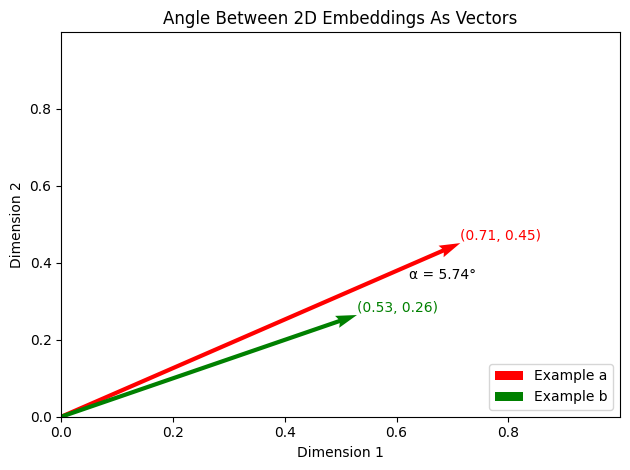

In [127]:
# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a[0], example_a[1], angles='xy', scale_units='xy', scale=1, color='red', label='Example a')
plt.quiver(0, 0, example_b[0], example_b[1], angles='xy', scale_units='xy', scale=1, color='green', label='Example b')

# Annotate the ends of the vectors with their coordinates
plt.text(example_a[0], example_a[1], f"({example_a[0]:.2f}, {example_a[1]:.2f})", color='red', ha='left', va='bottom')
plt.text(example_b[0], example_b[1], f"({example_b[0]:.2f}, {example_b[1]:.2f})", color='green', ha='left', va='bottom')

# Annotate the angle between the vectors
plt.text((example_a[0]+example_b[0])/2, (example_a[1]+example_b[1])/2, f'\u03B1 = {angle:.2f}\u00B0', color='black') 

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(0, max(embeddings[:, 0]))
plt.ylim(0, max(embeddings[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Angle Between 2D Embeddings As Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

#### Between Normalized Vectors

Calculate the cosine similarity by first calculating the angle between the vectors (notice that the dot product is still needed):

In [277]:
angle_normalized = np.arccos(dot_product_normalized / (np.linalg.norm(example_a_normalized, 2) * np.linalg.norm(example_b_normalized, 2))) # in radians
angle_normalized = np.degrees(angle_normalized)
angle_normalized

5.742139874110529

In [278]:
cosine_similarity_normalized = np.cos(np.radians(angle_normalized))
cosine_similarity_normalized

0.9949822531952275

Calcualte the cosine similarity using the result of the dot product calculation:

In [279]:
cosine_similarity_normalized = dot_product_normalized / (np.linalg.norm(example_a_normalized, 2) * np.linalg.norm(example_b_normalized, 2))
cosine_similarity_normalized

0.9949822531952275

Visualize the angle between these vectors:

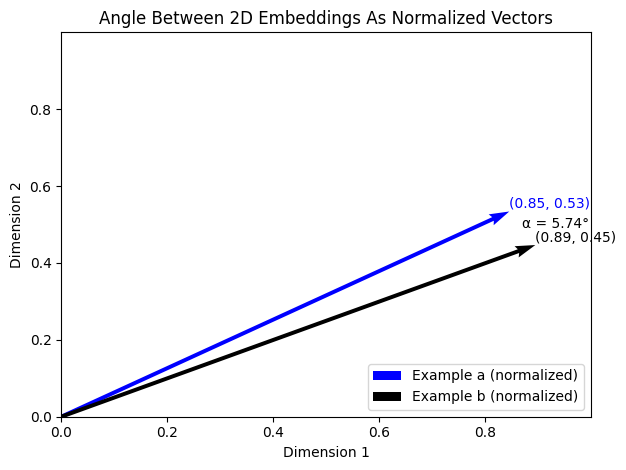

In [280]:
# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a_normalized[0], example_a_normalized[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Example a (normalized)')
plt.quiver(0, 0, example_b_normalized[0], example_b_normalized[1], angles='xy', scale_units='xy', scale=1, color='black', label='Example b (normalized)')

# Annotate the ends of the vectors with their coordinates
plt.text(example_a_normalized[0], example_a_normalized[1], f"({example_a_normalized[0]:.2f}, {example_a_normalized[1]:.2f})", color='blue', ha='left', va='bottom')
plt.text(example_b_normalized[0], example_b_normalized[1], f"({example_b_normalized[0]:.2f}, {example_b_normalized[1]:.2f})", color='black', ha='left', va='bottom')

# Annotate the angle between the vectors
plt.text((example_a_normalized[0]+example_b_normalized[0])/2, (example_a_normalized[1]+example_b_normalized[1])/2, f'\u03B1 = {angle_normalized:.2f}\u00B0', color='black') 

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(0, max(embeddings_normalized[:, 0]))
plt.ylim(0, max(embeddings_normalized[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Angle Between 2D Embeddings As Normalized Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
## Interpreting Distance Measures

A common question is how to pick the right distance measure.  Short answer is use dot product.  But why?  Rather than trust me, let's look at the range of possibilites in comparisons and see the calculated values of the distance measures.

In [159]:
base_embedding = np.array([.5, .5])

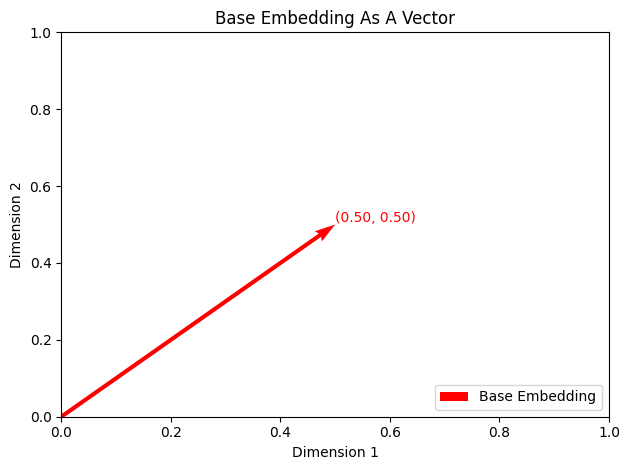

In [241]:
# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, base_embedding[0], base_embedding[1], angles='xy', scale_units='xy', scale=1, color='red', label='Base Embedding')

# Annotate the ends of the vectors with their coordinates
plt.text(base_embedding[0], base_embedding[1], f"({base_embedding[0]:.2f}, {base_embedding[1]:.2f})", color='red', ha='left', va='bottom')

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(0, 1)
plt.ylim(0, 1)

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Base Embedding As A Vector')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

In [189]:
base_magnitude = np.linalg.norm(base_embedding)
magnitudes = [base_magnitude / 2, base_magnitude, base_magnitude * 2]
angles = [-20, 20, -45, 45, -90, 90, -135, 135, 180]


comparison_embeddings = []
for magnitude in magnitudes:
    base_vector = base_embedding * (magnitude / base_magnitude)
    for angle in angles:
        r = np.radians(angle)
        rotation_matrix = np.array([
            [np.cos(r), -np.sin(r)],
            [np.sin(r), np.cos(r)]
        ])
        comparison_embeddings.append(np.dot(rotation_matrix, base_vector))
    comparison_embeddings.append(base_vector)
comparison_embeddings = np.array(comparison_embeddings)

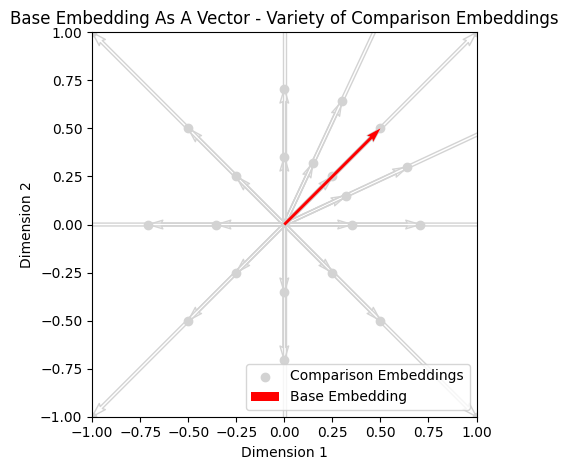

In [199]:
# Create a scatter plot of all embeddings
plt.scatter(comparison_embeddings[:, 0], comparison_embeddings[:, 1], color='lightgrey', label='Comparison Embeddings')

# Plot the two examples as vectors with arrows from the origin
for e in comparison_embeddings:
    plt.quiver(0, 0, e[0], e[1], angles='xy', scale_units='xy', scale=1, color='lightgrey', linewidths=1, linestyle='---', facecolor='none', edgecolor='lightgrey')
plt.quiver(0, 0, base_embedding[0], base_embedding[1], angles='xy', scale_units='xy', scale=1, color='red', label='Base Embedding')


# Annotate the ends of the vectors with their coordinates
#plt.text(base_embedding[0], base_embedding[1], f"({base_embedding[0]:.2f}, {base_embedding[1]:.2f})", color='red', ha='left', va='bottom')

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Base Embedding As A Vector - Variety of Comparison Embeddings')
plt.legend(loc = 'lower right')

# Set the aspect ratio to 'equal' for a square plot area
plt.gca().set_aspect('equal')
# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
### Euclidean Distance

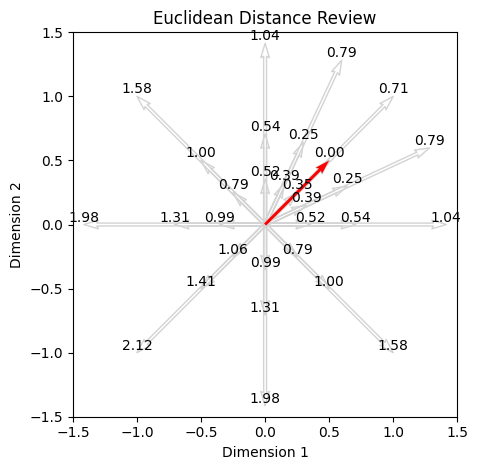

In [198]:
# Plot the two examples as vectors with arrows from the origin
for e in comparison_embeddings:
    plt.quiver(0, 0, e[0], e[1], angles='xy', scale_units='xy', scale=1, color='lightgrey', linewidths=1, linestyle='---', facecolor='none', edgecolor='lightgrey')
    dist = np.linalg.norm((base_embedding - e), 2)
    plt.text(e[0], e[1], f"{dist:.2f}", color='black', ha='center', va='bottom')
plt.quiver(0, 0, base_embedding[0], base_embedding[1], angles='xy', scale_units='xy', scale=1, color='red', label='Base Embedding')

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Euclidean Distance Review')

# Set the aspect ratio to 'equal' for a square plot area
plt.gca().set_aspect('equal')
# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
### Dot Product Similarity Review

- When $\alpha < 90$ dot product is > 0
- When $\alpha = 90$ dot product is 0
- When $\alpha > 90$ dot product is < 0

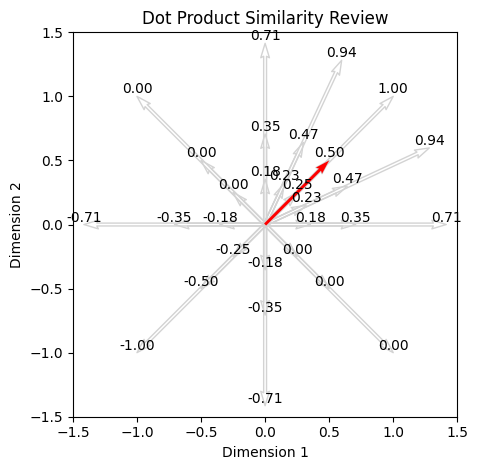

In [197]:
# Plot the two examples as vectors with arrows from the origin
for e in comparison_embeddings:
    plt.quiver(0, 0, e[0], e[1], angles='xy', scale_units='xy', scale=1, color='lightgrey', linewidths=1, linestyle='---', facecolor='none', edgecolor='lightgrey')
    dist = np.dot(base_embedding, e)
    plt.text(e[0], e[1], f"{dist:.2f}", color='black', ha='center', va='bottom')
plt.quiver(0, 0, base_embedding[0], base_embedding[1], angles='xy', scale_units='xy', scale=1, color='red', label='Base Embedding')

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Dot Product Similarity Review')

# Set the aspect ratio to 'equal' for a square plot area
plt.gca().set_aspect('equal')
# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
### Cosine Similarity Review

- If the angle between vectors is 0: $\cos(0) = 1$
- If the angle between vectors is 180: $\cos(180) = -1$
- If the angle between vectors is 90: $\cos(90) = 0$

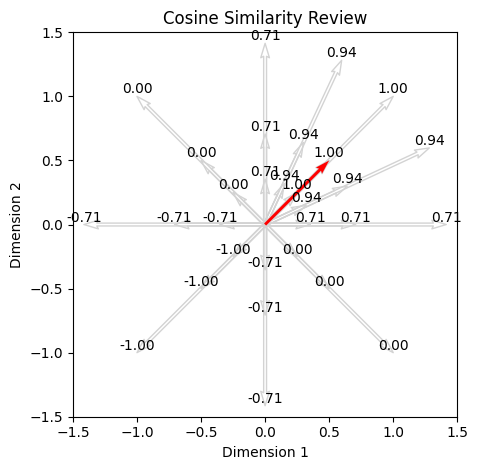

In [201]:
# Plot the two examples as vectors with arrows from the origin
for e in comparison_embeddings:
    plt.quiver(0, 0, e[0], e[1], angles='xy', scale_units='xy', scale=1, color='lightgrey', linewidths=1, linestyle='---', facecolor='none', edgecolor='lightgrey')
    dist = np.dot(base_embedding, e) / (np.linalg.norm(base_embedding, 2) * np.linalg.norm(e, 2))
    plt.text(e[0], e[1], f"{dist:.2f}", color='black', ha='center', va='bottom')
plt.quiver(0, 0, base_embedding[0], base_embedding[1], angles='xy', scale_units='xy', scale=1, color='red', label='Base Embedding')

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Cosine Similarity Review')

# Set the aspect ratio to 'equal' for a square plot area
plt.gca().set_aspect('equal')
# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
## Vector Search 

In [203]:
query_embedding = embeddings[0]

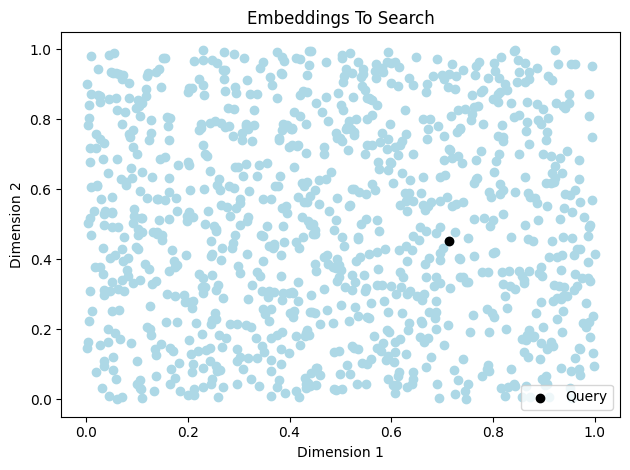

In [205]:
# Create a scatter plot of all embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1], color='lightblue')

# Plot one embedding as the query embedding
plt.scatter(query_embedding[0], query_embedding[1], color='black', label='Query')

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Embeddings To Search')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
### Euclidean Distance

In [235]:
distances = []
for embedding in embeddings:
    distances.append(np.linalg.norm((query_embedding - embedding), 2))
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_distances = scaler.fit_transform(np.array(distances).reshape(-1, 1))

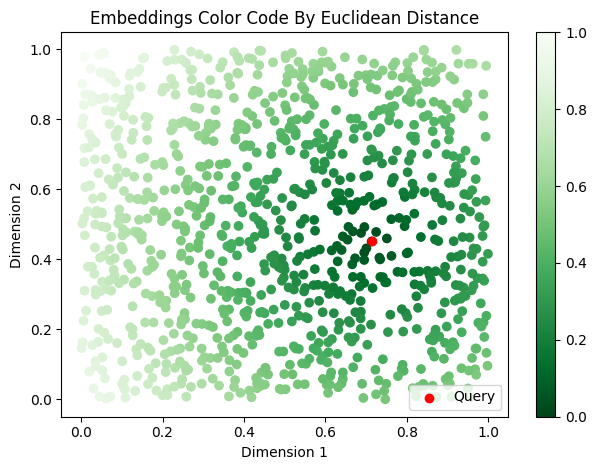

In [238]:
# color map:
cmap = plt.cm.Greens_r

# Create a scatter plot of all embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=normalized_distances, cmap=cmap)
plt.colorbar()

# Plot one embedding as the query embedding
plt.scatter(query_embedding[0], query_embedding[1], color='red', label='Query')

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Embeddings Color Code By Euclidean Distance')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
### Dot Product Similarity

In [239]:
distances = []
for embedding in embeddings:
    distances.append(np.dot(query_embedding, embedding))
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_distances = scaler.fit_transform(np.array(distances).reshape(-1, 1))

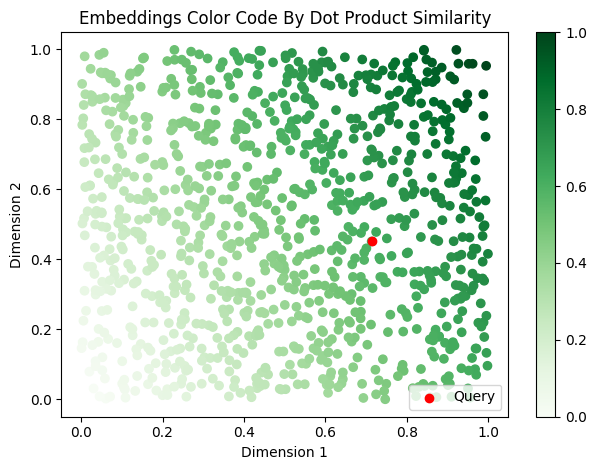

In [240]:
# color map:
cmap = plt.cm.Greens

# Create a scatter plot of all embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=normalized_distances, cmap=cmap)
plt.colorbar()

# Plot one embedding as the query embedding
plt.scatter(query_embedding[0], query_embedding[1], color='red', label='Query')

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Embeddings Color Code By Dot Product Similarity')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
### Cosine Similaritty

In [228]:
distances = []
for embedding in embeddings:
    distances.append(np.dot(query_embedding, embedding) / (np.linalg.norm(query_embedding, 2) * np.linalg.norm(embedding, 2)))
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_distances = scaler.fit_transform(np.array(distances).reshape(-1, 1))

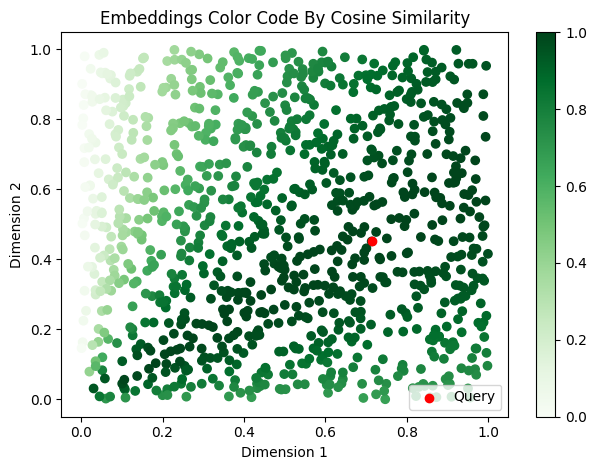

In [231]:
# color map:
cmap = plt.cm.Greens

# Create a scatter plot of all embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=normalized_distances, cmap=cmap)
plt.colorbar()

# Plot one embedding as the query embedding
plt.scatter(query_embedding[0], query_embedding[1], color='red', label='Query')

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Embeddings Color Code By Cosine Similarity')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
## Comparing Distance Measures



## More in development

- deeper dive into intuition of the three distance measures
- compare/contrast measures + tips on picking (like if embedding was trained with a specific one then use that one)
- applying the distance measures to the full set of embeddings with visuals to guide intuition